# Import Libray dan Gattering Data

In [ ]:
#import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# URL file
url = 'https://drive.google.com/uc?export=download&id=1x4n8p5nSb-qOy_AyyWNXbtKuAqgKEeHP'

# Membaca file langsung dari URL
df = pd.read_csv(url)

df.head()

,Country,Density\n(P/Km2),Abbreviation,Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Calling Code,Capital/Major City,Co2-Emissions,...,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude
0,Afghanistan,60,AF,58.10%,"652,230","323,000",32.49,93.0,Kabul,"8,672",...,78.40%,0.28,"38,041,754",48.90%,9.30%,71.40%,11.12%,"9,797,273",33.939110,67.709953
1,Albania,105,AL,43.10%,"28,748","9,000",11.78,355.0,Tirana,"4,536",...,56.90%,1.20,"2,854,191",55.70%,18.60%,36.60%,12.33%,"1,747,593",41.153332,20.168331
2,Algeria,18,DZ,17.40%,"2,381,741","317,000",24.28,213.0,Algiers,"150,006",...,28.10%,1.72,"43,053,054",41.20%,37.20%,66.10%,11.70%,"31,510,100",28.033886,1.659626
3,Andorra,164,AD,40.00%,468,NaN,7.20,376.0,Andorra la Vella,469,...,36.40%,3.33,"77,142",NaN,NaN,NaN,NaN,"67,873",42.506285,1.521801
4,Angola,26,AO,47.50%,"1,246,700","117,000",40.73,244.0,Luanda,"34,693",...,33.40%,0.21,"31,825,295",77.50%,9.20%,49.10%,6.89%,"21,061,025",-11.202692,17.873887


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 35 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Country                                    195 non-null    object 
 1   Density
(P/Km2)                            195 non-null    object 
 2   Abbreviation                               188 non-null    object 
 3   Agricultural Land( %)                      188 non-null    object 
 4   Land Area(Km2)                             194 non-null    object 
 5   Armed Forces size                          171 non-null    object 
 6   Birth Rate                                 189 non-null    float64
 7   Calling Code                               194 non-null    float64
 8   Capital/Major City                         192 non-null    object 
 9   Co2-Emissions                              188 non-null    object 
 10  CPI                       

In [ ]:
# Pilih variabel yang diinginkan
selected =  [
    'Birth Rate', 'Co2-Emissions',"CPI Change (%)", 'Fertility Rate', 'GDP',
    'Infant mortality', 'Life expectancy', 'Maternal mortality ratio',
    'Minimum wage', 'Out of pocket health expenditure',
    'Physicians per thousand', 'Population', 'Tax revenue (%)'
]

# Filter dataframe berdasarkan kolom yang dipilih
df = df[selected]

# Ganti nama kolom dengan "_" untuk menggantikan spasi
df.columns = df.columns.str.replace(' ', '_').str.replace('-', '_')

# Tampilkan 5 data teratas untuk memastikan perubahan
print(df.head())


   Birth_Rate Co2_Emissions CPI_Change_(%)  Fertility_Rate                GDP  \
0       32.49         8,672          2.30%            4.47   $19,101,353,833    
1       11.78         4,536          1.40%            1.62   $15,278,077,447    
2       24.28       150,006          2.00%            3.02  $169,988,236,398    
3        7.20           469            NaN            1.27    $3,154,057,987    
4       40.73        34,693         17.10%            5.52   $94,635,415,870    

   Infant_mortality  Life_expectancy  Maternal_mortality_ratio Minimum_wage  \
0              47.9             64.5                     638.0       $0.43    
1               7.8             78.5                      15.0       $1.12    
2              20.1             76.7                     112.0       $0.95    
3               2.7              NaN                       NaN       $6.63    
4              51.6             60.8                     241.0       $0.71    

  Out_of_pocket_health_expenditure  Ph

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Birth_Rate                        189 non-null    float64
 1   Co2_Emissions                     188 non-null    object 
 2   CPI_Change_(%)                    179 non-null    object 
 3   Fertility_Rate                    188 non-null    float64
 4   GDP                               193 non-null    object 
 5   Infant_mortality                  189 non-null    float64
 6   Life_expectancy                   187 non-null    float64
 7   Maternal_mortality_ratio          181 non-null    float64
 8   Minimum_wage                      150 non-null    object 
 9   Out_of_pocket_health_expenditure  188 non-null    object 
 10  Physicians_per_thousand           188 non-null    float64
 11  Population                        194 non-null    object 
 12  Tax_reve

In [ ]:
# Membersihkan simbol '$', '%', dan ',' pada kolom yang relevan
columns_to_clean = ['Co2_Emissions', 'GDP', 'Minimum_wage',
                    'Out_of_pocket_health_expenditure', 'Population',
                    'Tax_revenue_(%)','CPI_Change_(%)']

for col in columns_to_clean:
    df[col] = df[col].replace({r'[^\d.]': ''}, regex=True)  # Menghapus simbol non-numerik


<ipython-input-145-eb82b180df9b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].replace({r'[^\d.]': ''}, regex=True)  # Menghapus simbol non-numerik


In [ ]:
# Mengonversi kolom yang sudah dibersihkan menjadi tipe numerik
df[columns_to_clean] = df[columns_to_clean].apply(pd.to_numeric, errors='coerce')

<ipython-input-146-cbe81065cf66>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[columns_to_clean] = df[columns_to_clean].apply(pd.to_numeric, errors='coerce')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Birth_Rate                        189 non-null    float64
 1   Co2_Emissions                     188 non-null    float64
 2   CPI_Change_(%)                    179 non-null    float64
 3   Fertility_Rate                    188 non-null    float64
 4   GDP                               193 non-null    float64
 5   Infant_mortality                  189 non-null    float64
 6   Life_expectancy                   187 non-null    float64
 7   Maternal_mortality_ratio          181 non-null    float64
 8   Minimum_wage                      150 non-null    float64
 9   Out_of_pocket_health_expenditure  188 non-null    float64
 10  Physicians_per_thousand           188 non-null    float64
 11  Population                        194 non-null    float64
 12  Tax_reve

In [ ]:
df.head()

,Birth_Rate,Co2_Emissions,CPI_Change_(%),Fertility_Rate,GDP,Infant_mortality,Life_expectancy,Maternal_mortality_ratio,Minimum_wage,Out_of_pocket_health_expenditure,Physicians_per_thousand,Population,Tax_revenue_(%)
0,32.49,8672.0,2.3,4.47,1.910135e+10,47.9,64.5,638.0,0.43,78.4,0.28,38041754.0,9.3
1,11.78,4536.0,1.4,1.62,1.527808e+10,7.8,78.5,15.0,1.12,56.9,1.20,2854191.0,18.6
2,24.28,150006.0,2.0,3.02,1.699882e+11,20.1,76.7,112.0,0.95,28.1,1.72,43053054.0,37.2
3,7.20,469.0,NaN,1.27,3.154058e+09,2.7,NaN,NaN,6.63,36.4,3.33,77142.0,NaN
4,40.73,34693.0,17.1,5.52,9.463542e+10,51.6,60.8,241.0,0.71,33.4,0.21,31825295.0,9.2


# Data Prep

## Handling misval

In [ ]:
df.isnull().sum()

,0
Birth_Rate,6
Co2_Emissions,7
CPI_Change_(%),16
Fertility_Rate,7
GDP,2
Infant_mortality,6
Life_expectancy,8
Maternal_mortality_ratio,14
Minimum_wage,45
Out_of_pocket_health_expenditure,7


In [ ]:
# Mengisi nilai kosong dengan median setiap kolom
df.fillna(df.median(numeric_only=True), inplace=True)

<ipython-input-150-22c21c27a061>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.fillna(df.median(numeric_only=True), inplace=True)


In [ ]:
df.isnull().sum()

,0
Birth_Rate,0
Co2_Emissions,0
CPI_Change_(%),0
Fertility_Rate,0
GDP,0
Infant_mortality,0
Life_expectancy,0
Maternal_mortality_ratio,0
Minimum_wage,0
Out_of_pocket_health_expenditure,0


## Handling duplicate

In [ ]:
df.duplicated().sum()

0

## Spliting Data

In [ ]:
# train-test split
X = df.drop(columns=['Life_expectancy'])
y = df.Life_expectancy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Asumsikan X_train, X_test, y_train, dan y_test telah didapat melalui operasi train_test_split

# Mengubah X_train dan X_test kembali menjadi DataFrame jika diperlukan (mereka seharusnya sudah DataFrame)
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

# Mengubah y_train dan y_test kembali menjadi Series jika diperlukan (mereka seharusnya sudah Series)
y_train = pd.Series(y_train)
y_test = pd.Series(y_test)

## Handling Outlier

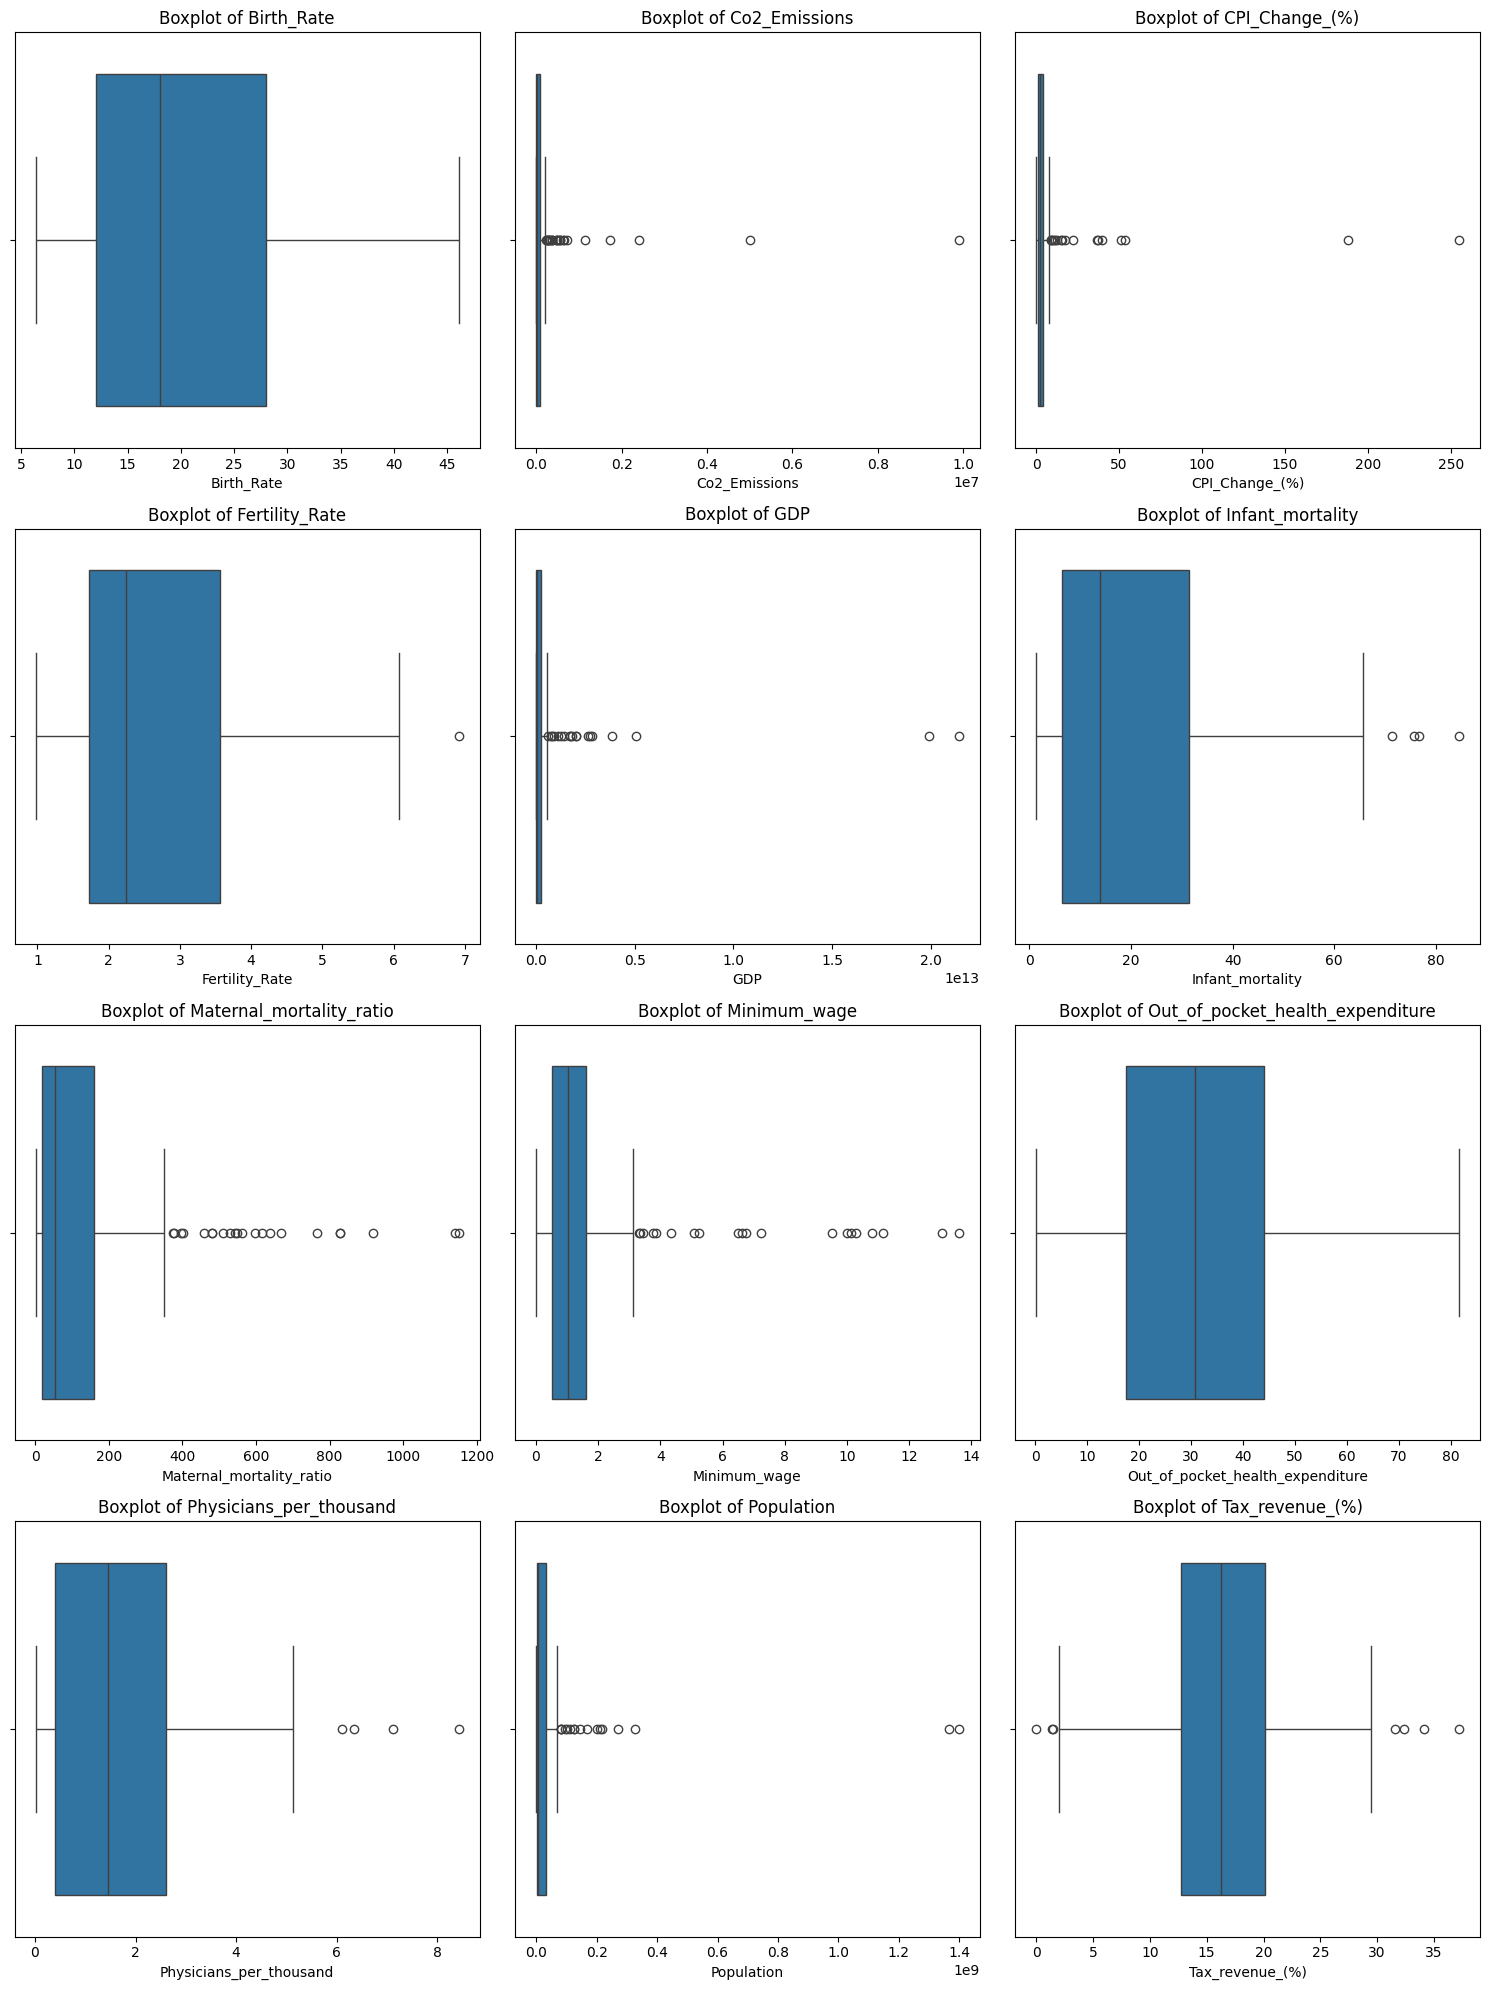

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Daftar variabel yang akan divisualisasikan
variables = [
    'Birth_Rate', 'Co2_Emissions', 'CPI_Change_(%)', 'Fertility_Rate', 'GDP', 'Infant_mortality',
    'Maternal_mortality_ratio', 'Minimum_wage', 'Out_of_pocket_health_expenditure',
    'Physicians_per_thousand', 'Population', 'Tax_revenue_(%)'
]

# Atur jumlah baris dan kolom untuk subplot berdasarkan jumlah variabel
n_rows = (len(variables) + 2) // 3  # 3 kolom per baris
fig, axes = plt.subplots(n_rows, 3, figsize=(15, 5 * n_rows))

# Flatten axes untuk kemudahan penempatan variabel
axes = axes.flatten()

# Plot setiap variabel ke subplot masing-masing
for i, var in enumerate(variables):
    sns.boxplot(data=X_train, x=var, ax=axes[i])
    axes[i].set_title(f'Boxplot of {var}')  # Tambahkan judul

# Nonaktifkan subplot kosong (jika ada)
for j in range(len(variables), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


In [ ]:
# Daftar fitur yang akan diperiksa dan dihandle outlier-nya
features = [
    'Birth_Rate', 'Co2_Emissions', 'CPI_Change_(%)', 'Fertility_Rate', 'GDP', 'Infant_mortality',
    'Maternal_mortality_ratio', 'Minimum_wage', 'Out_of_pocket_health_expenditure',
    'Physicians_per_thousand', 'Population', 'Tax_revenue_(%)'
]

# Hitung Q1, Q3, dan IQR untuk semua fitur sekaligus
Q1 = X_train[features].quantile(0.25)
Q3 = X_train[features].quantile(0.75)
IQR = Q3 - Q1

# Tentukan batas bawah dan atas untuk setiap fitur
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Lakukan capping langsung pada seluruh dataframe
X_train[features] = X_train[features].apply(
    lambda x: np.where(x < lower_bound[x.name], lower_bound[x.name],
                       np.where(x > upper_bound[x.name], upper_bound[x.name], x))
)


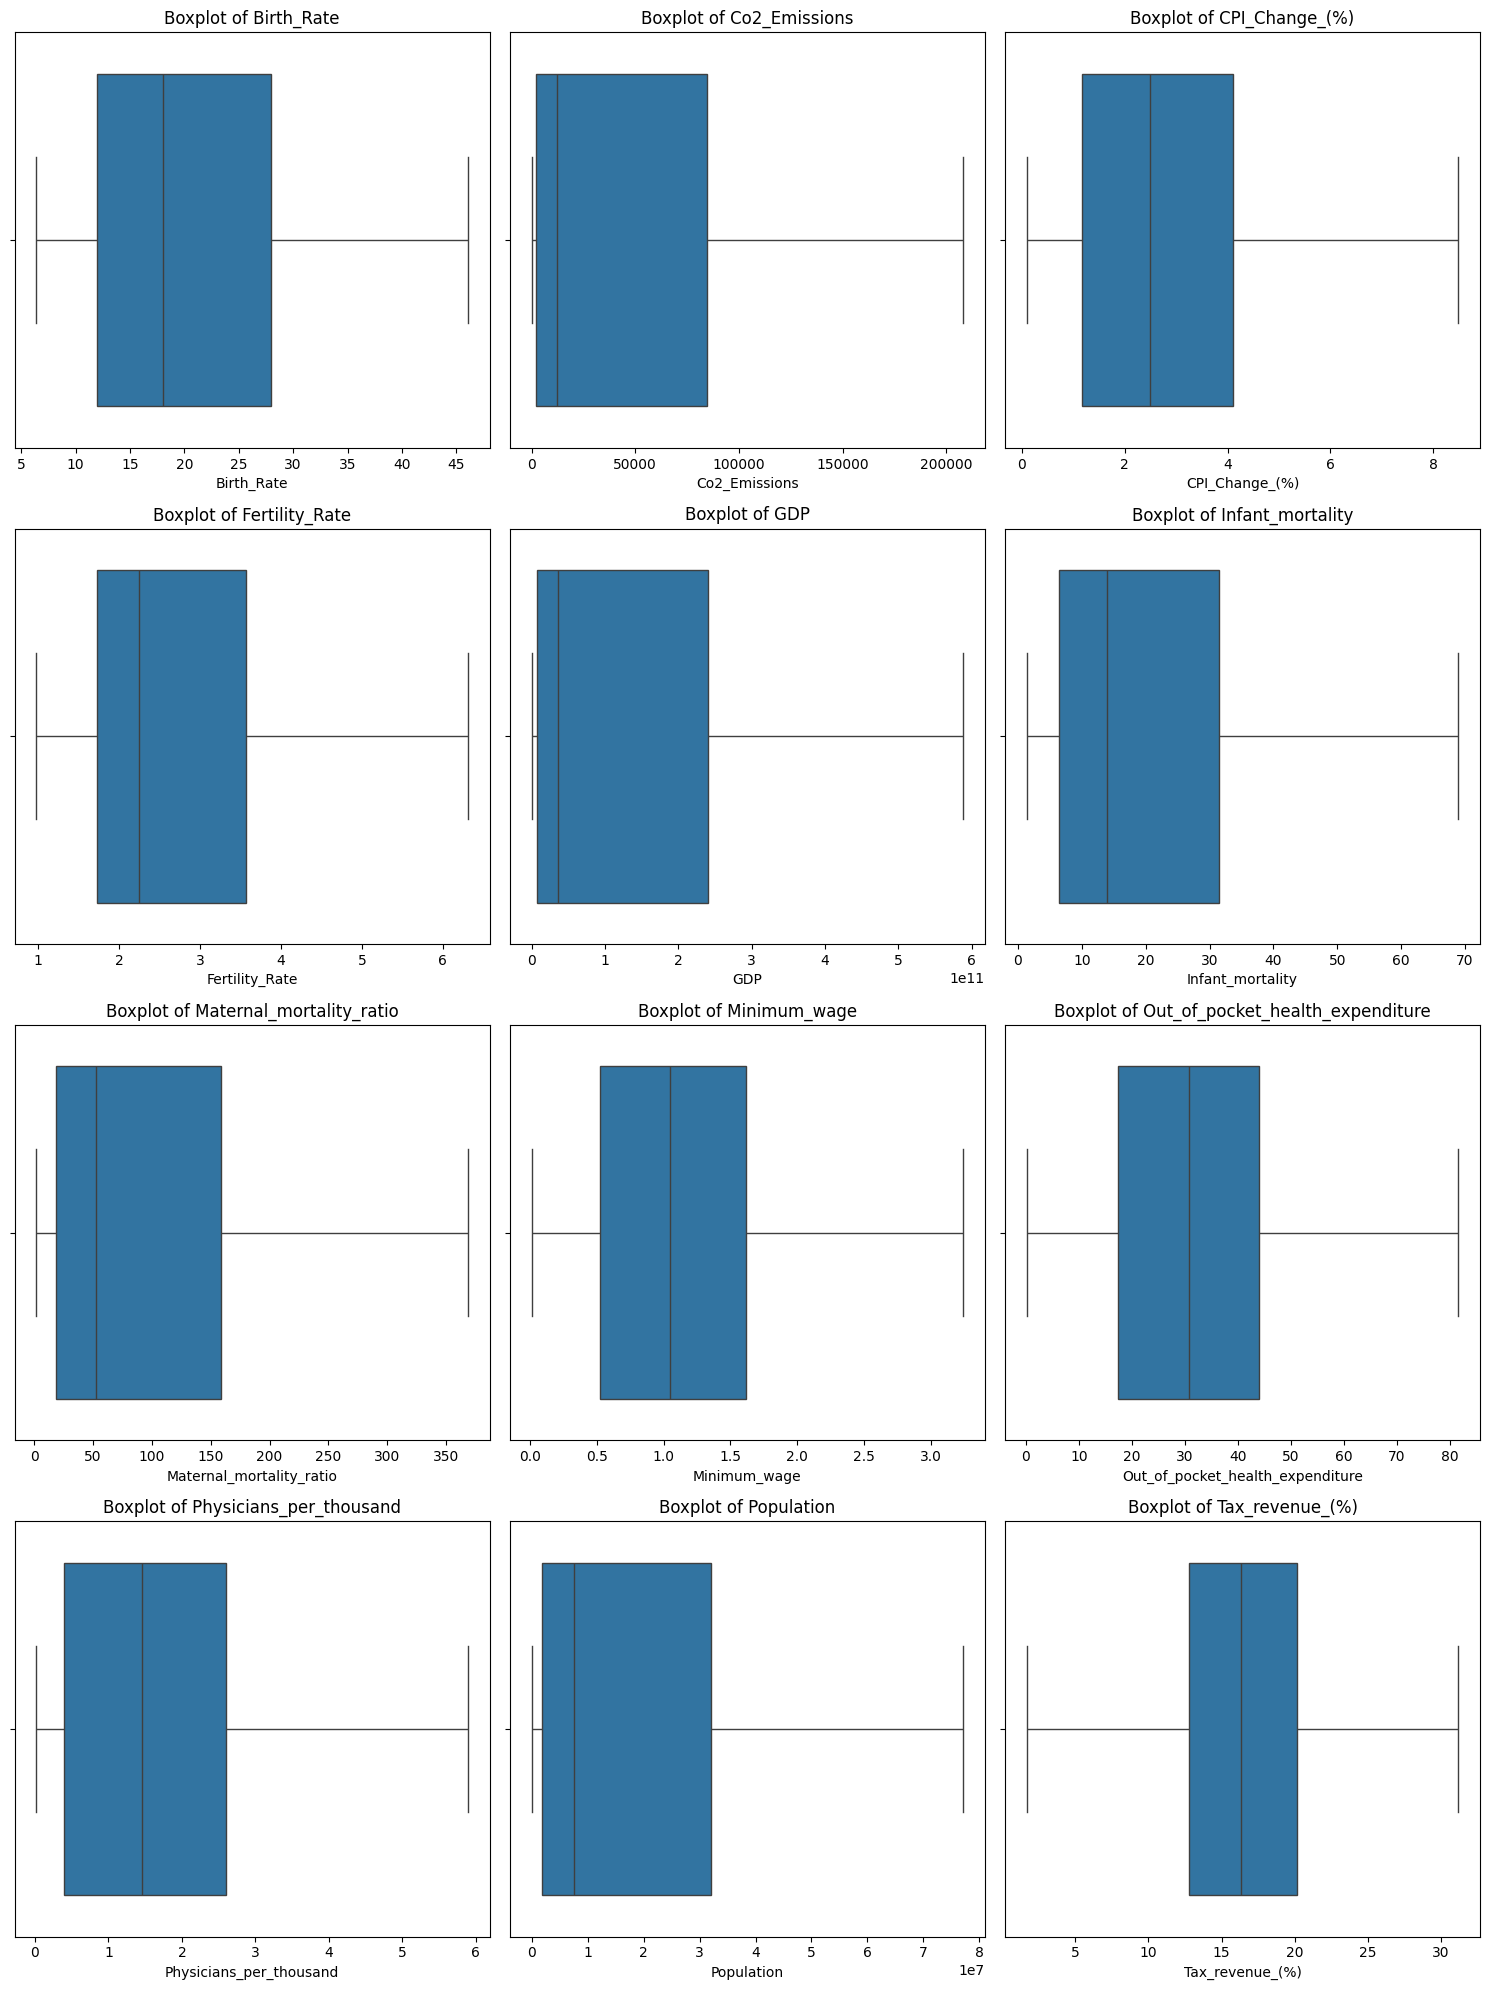

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Daftar variabel yang akan divisualisasikan
variables = [
    'Birth_Rate', 'Co2_Emissions', 'CPI_Change_(%)', 'Fertility_Rate', 'GDP', 'Infant_mortality',
    'Maternal_mortality_ratio', 'Minimum_wage', 'Out_of_pocket_health_expenditure',
    'Physicians_per_thousand', 'Population', 'Tax_revenue_(%)',
]

# Atur jumlah baris dan kolom untuk subplot berdasarkan jumlah variabel
n_rows = (len(variables) + 2) // 3  # 3 kolom per baris
fig, axes = plt.subplots(n_rows, 3, figsize=(15, 5 * n_rows))

# Flatten axes untuk kemudahan penempatan variabel
axes = axes.flatten()

# Plot setiap variabel ke subplot masing-masing
for i, var in enumerate(variables):
    sns.boxplot(data=X_train, x=var, ax=axes[i])
    axes[i].set_title(f'Boxplot of {var}')  # Tambahkan judul

# Nonaktifkan subplot kosong (jika ada)
for j in range(len(variables), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


# EDA

In [ ]:
df.describe()

,Birth_Rate,Co2_Emissions,CPI_Change_(%),Fertility_Rate,GDP,Infant_mortality,Life_expectancy,Maternal_mortality_ratio,Minimum_wage,Out_of_pocket_health_expenditure,Physicians_per_thousand,Population,Tax_revenue_(%)
count,195.000000,1.950000e+02,195.000000,195.000000,1.950000e+02,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,1.950000e+02,195.000000
mean,20.145282,1.718583e+05,6.598462,2.681872,4.727532e+11,21.107179,72.317436,152.682051,1.928949,32.567692,1.826205,3.922447e+07,16.537436
std,9.798615,8.240967e+05,23.387283,1.261755,2.161411e+12,19.285229,7.330019,226.629794,2.648408,18.827087,1.655113,1.447345e+08,6.479029
min,5.900000,1.100000e+01,0.100000,0.980000,4.727146e+07,1.400000,52.800000,2.000000,0.010000,0.200000,0.010000,8.360000e+02,0.000000
25%,11.450000,2.625500e+03,1.200000,1.710000,8.476801e+09,6.100000,67.450000,16.500000,0.530000,17.700000,0.360000,2.004434e+06,12.550000
50%,17.950000,1.230300e+04,2.500000,2.245000,3.438723e+10,14.000000,73.200000,53.000000,1.045000,30.700000,1.460000,8.826588e+06,16.300000
75%,28.445000,6.194100e+04,3.850000,3.565000,2.304710e+11,31.550000,77.250000,175.000000,1.625000,43.750000,2.875000,2.856227e+07,20.300000
max,46.080000,9.893038e+06,254.900000,6.910000,2.142770e+13,84.500000,85.400000,1150.000000,13.590000,81.600000,8.420000,1.397715e+09,37.200000


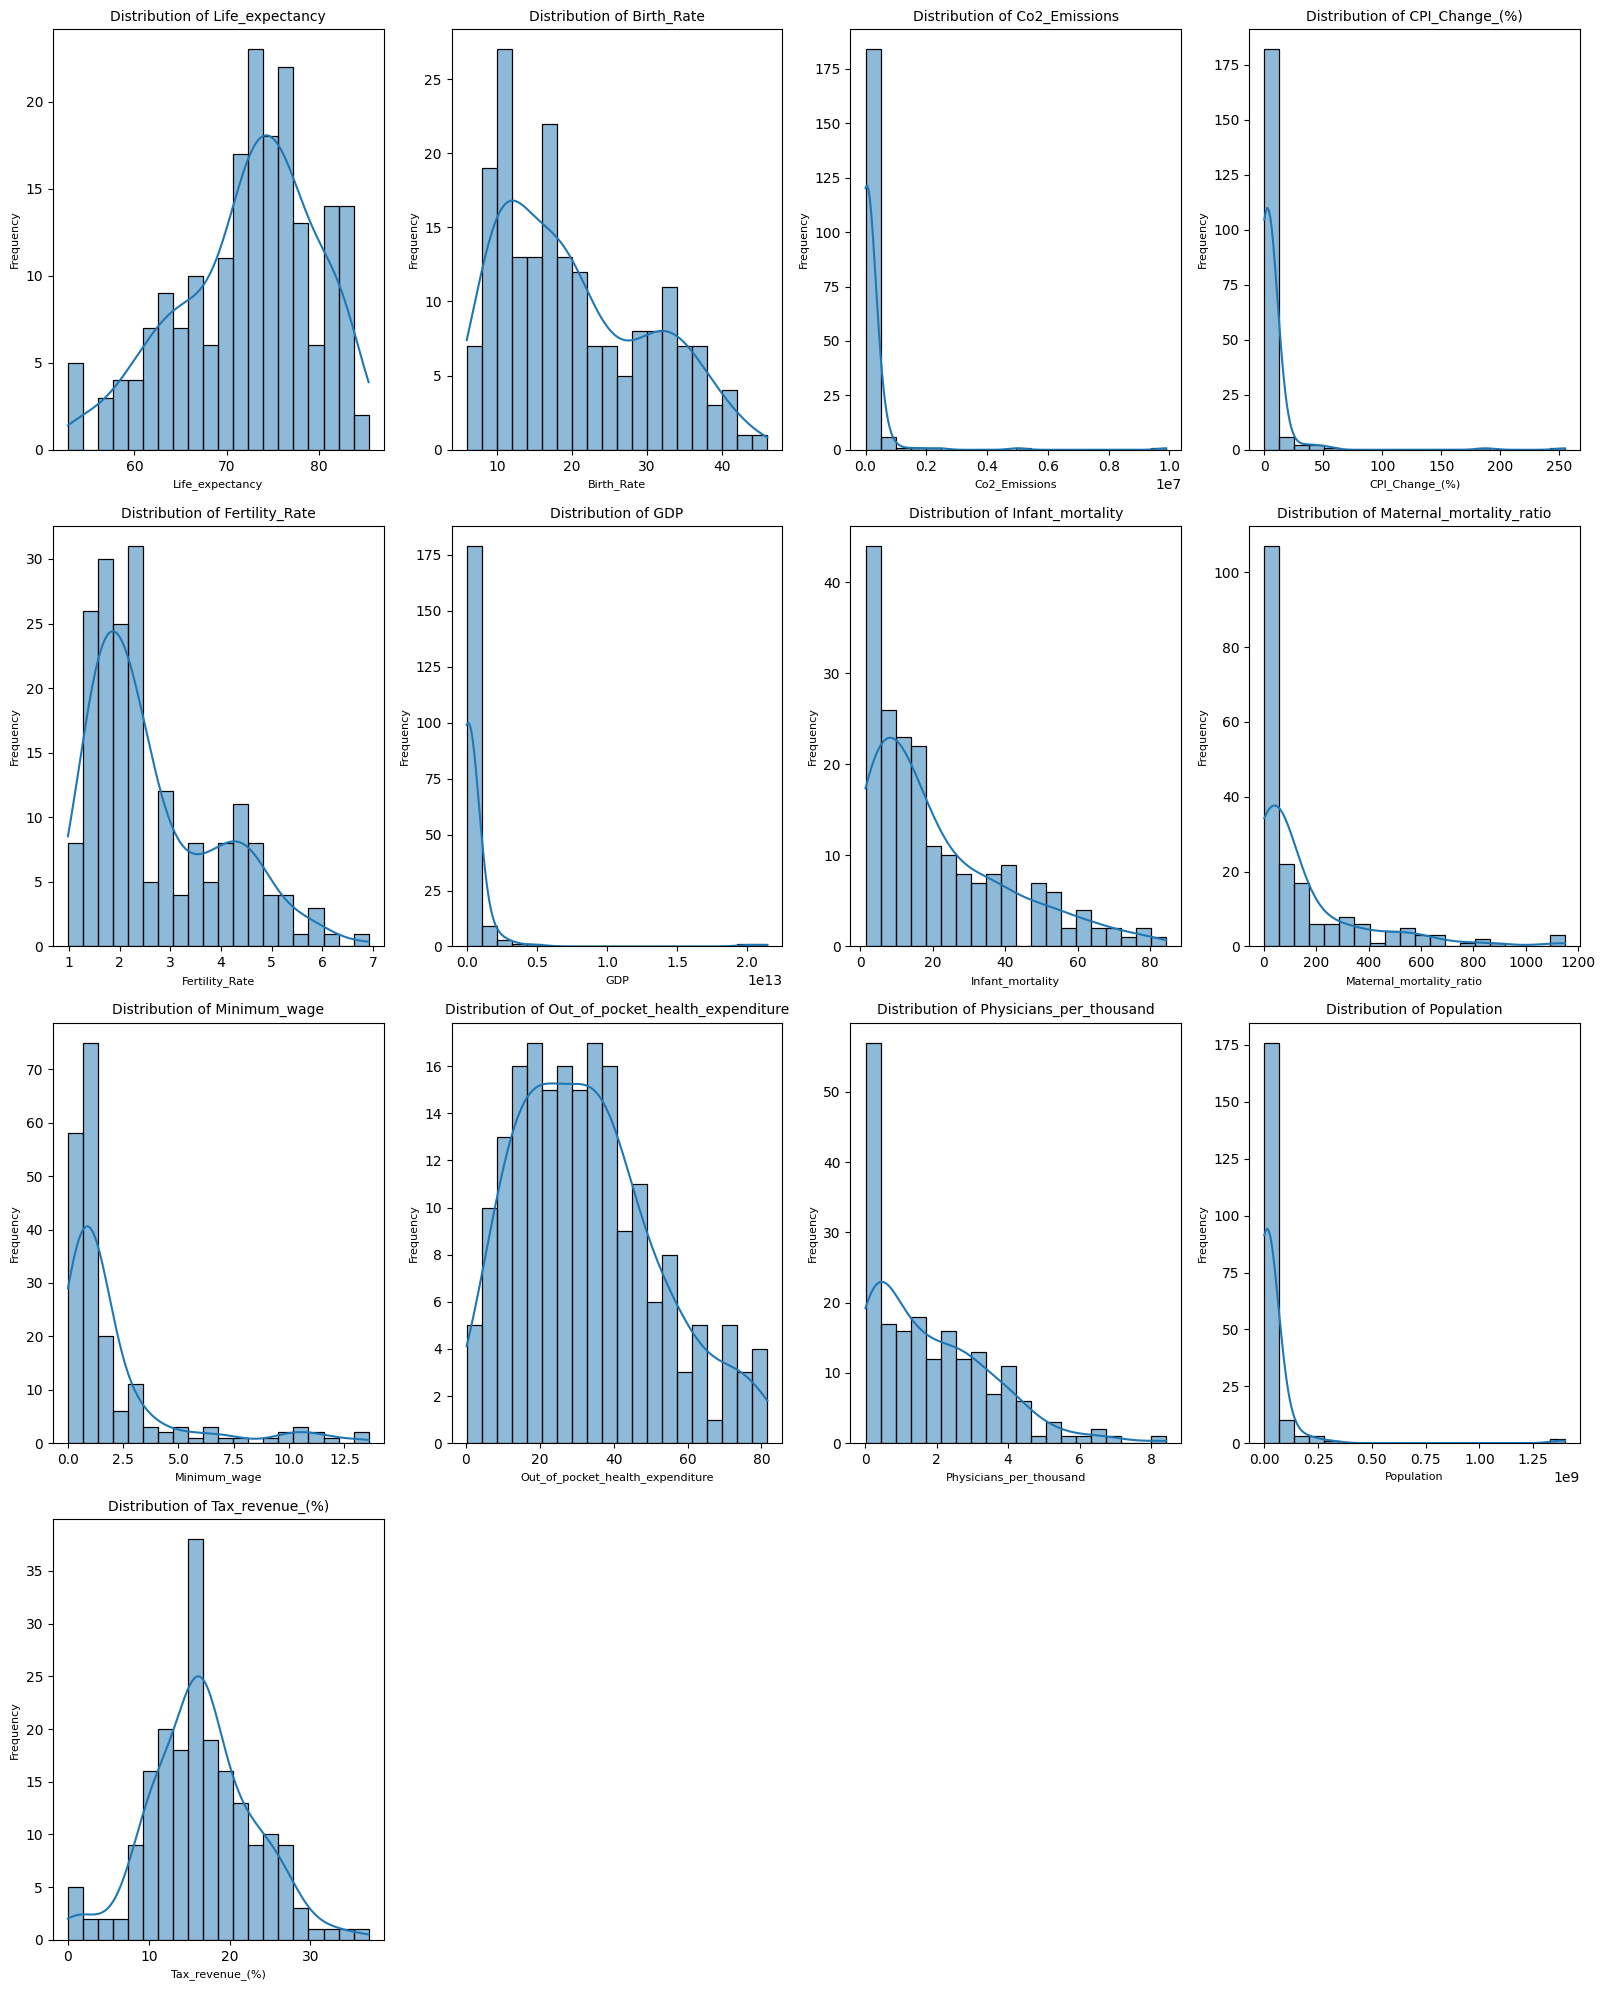

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pilih kolom numerik untuk histogram
numerical_features = [
    'Life_expectancy','Birth_Rate', 'Co2_Emissions', 'CPI_Change_(%)', 'Fertility_Rate', 'GDP', 'Infant_mortality',
    'Maternal_mortality_ratio', 'Minimum_wage', 'Out_of_pocket_health_expenditure',
    'Physicians_per_thousand', 'Population', 'Tax_revenue_(%)'
]

# Tentukan ukuran plot
fig, axes = plt.subplots(len(numerical_features) // 4 + 1, 4, figsize=(16, 20))
axes = axes.flatten()

# Buat histogram dengan garis distribusi
for i, feature in enumerate(numerical_features):
    sns.histplot(data=df, x=feature, bins=20, kde=True, ax=axes[i])
    axes[i].set_title(f"Distribution of {feature}", fontsize=10)
    axes[i].set_xlabel(feature, fontsize=8)
    axes[i].set_ylabel('Frequency', fontsize=8)

# Hilangkan subplot kosong (jika ada)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


# Feature Enggenering

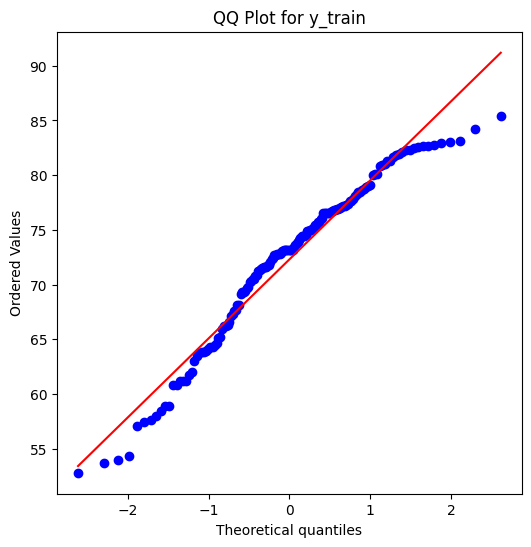

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Membuat QQ plot untuk y_train
plt.figure(figsize=(6, 6))
stats.probplot(y_train, dist="norm", plot=plt)
plt.title("QQ Plot for y_train")
plt.show()


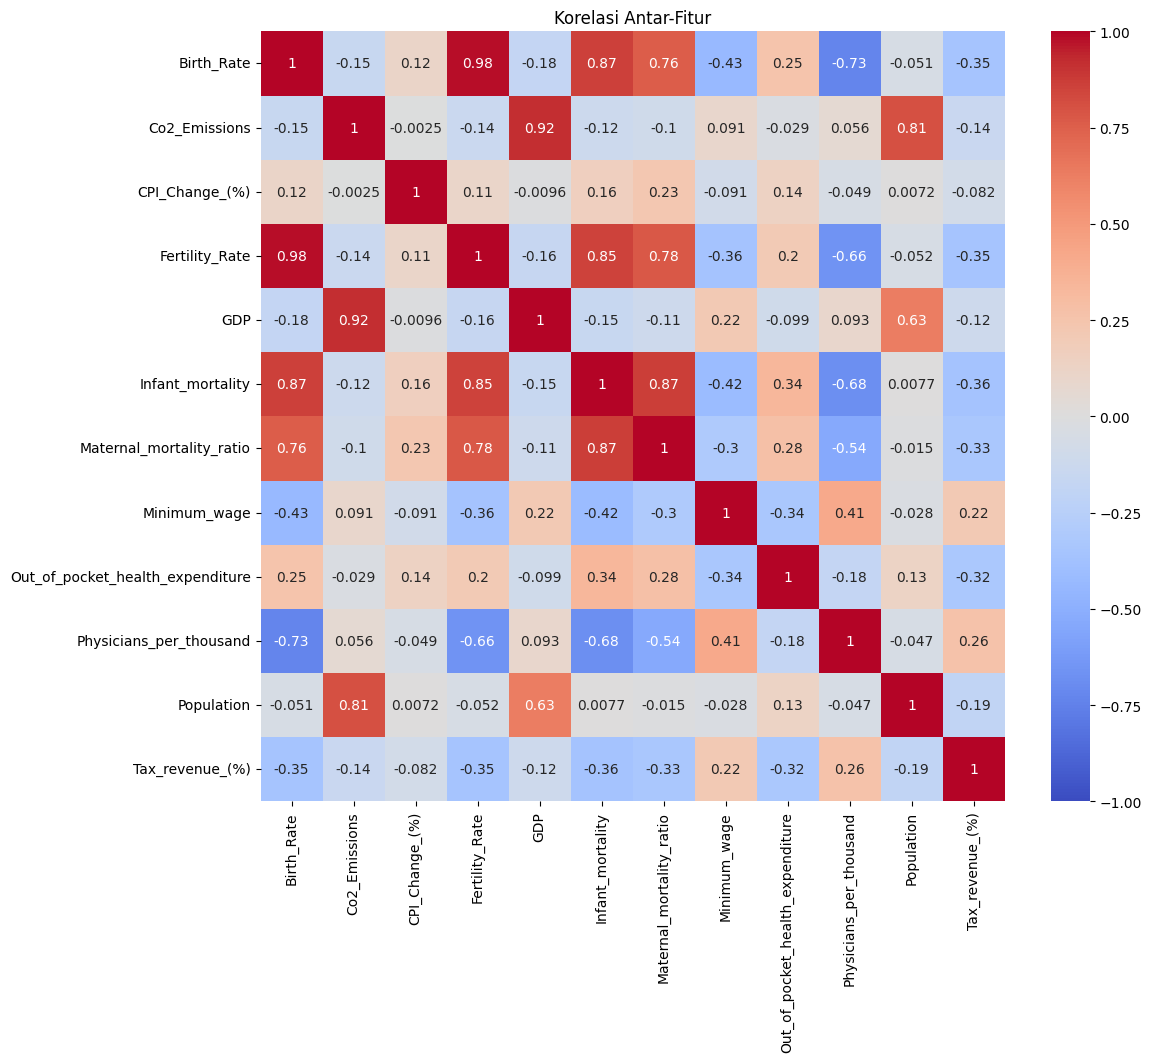

In [ ]:
# Menghitung korelasi antar-fitur numerik
correlation_matrix =df[[
    'Birth_Rate', 'Co2_Emissions', 'CPI_Change_(%)', 'Fertility_Rate', 'GDP', 'Infant_mortality',
    'Maternal_mortality_ratio', 'Minimum_wage', 'Out_of_pocket_health_expenditure',
    'Physicians_per_thousand', 'Population', 'Tax_revenue_(%)'
]].corr()

# Visualisasi dengan heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Korelasi Antar-Fitur")
plt.show()

In [ ]:
del X_train["Birth_Rate"]
del X_test["Birth_Rate"]
del X_train['Co2_Emissions']
del X_test['Co2_Emissions']
del X_train['Tax_revenue_(%)']
del X_test['Tax_revenue_(%)']

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

X = X_train[[
    'CPI_Change_(%)', 'Fertility_Rate', 'GDP', 'Infant_mortality',
    'Maternal_mortality_ratio', 'Minimum_wage', 'Out_of_pocket_health_expenditure',
    'Physicians_per_thousand', 'Population'
]].select_dtypes(include='number')

# Adding a constant column for intercept
X['Intercept'] = 1

# Calculating VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display VIF, excluding the intercept
vif_data = vif_data[vif_data['Feature'] != 'Intercept']
vif_data

,Feature,VIF
0,CPI_Change_(%),1.272528
1,Fertility_Rate,4.467828
2,GDP,4.312122
3,Infant_mortality,6.325804
4,Maternal_mortality_ratio,5.032956
5,Minimum_wage,1.639889
6,Out_of_pocket_health_expenditure,1.448028
7,Physicians_per_thousand,2.226550
8,Population,3.975209


**Scaling**

In [ ]:
from sklearn import preprocessing
import pandas as pd

columns_to_scale = X_train.select_dtypes('float64', 'int64').columns

scaler = preprocessing.MinMaxScaler()

X_train_scaled = X_train.copy()
X_train_scaled[columns_to_scale] = scaler.fit_transform(X_train[columns_to_scale])
X_test_scaled = X_test.copy()
X_test_scaled[columns_to_scale] = scaler.transform(X_test[columns_to_scale])
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns= X_train.columns,index= X_train.index)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns= X_test.columns,index= X_test.index)

print(X_train_scaled_df.head())

     CPI_Change_(%)  Fertility_Rate       GDP  Infant_mortality  \
5          0.131148        0.189449  0.002857          0.053284   
135        0.417288        0.483939  0.042371          0.541721   
122        0.298063        0.114420  1.000000          0.028122   
167        1.000000        0.270106  0.006695          0.229417   
85         0.047690        0.082532  1.000000          0.005920   

     Maternal_mortality_ratio  Minimum_wage  Out_of_pocket_health_expenditure  \
5                    0.109141      0.936993                          0.296069   
135                  0.390177      0.355624                          0.068796   
122                  0.008186      1.000000                          0.148649   
167                  0.321965      0.320062                          0.121622   
85                   0.008186      1.000000                          0.158477   

     Physicians_per_thousand  Population  
5                   0.466383    0.001129  
135                 0.00

In [ ]:
X_train_final = X_train_scaled_df.copy()
X_test_final = X_test_scaled_df.copy()

X_train_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 156 entries, 5 to 102
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CPI_Change_(%)                    156 non-null    float64
 1   Fertility_Rate                    156 non-null    float64
 2   GDP                               156 non-null    float64
 3   Infant_mortality                  156 non-null    float64
 4   Maternal_mortality_ratio          156 non-null    float64
 5   Minimum_wage                      156 non-null    float64
 6   Out_of_pocket_health_expenditure  156 non-null    float64
 7   Physicians_per_thousand           156 non-null    float64
 8   Population                        156 non-null    float64
dtypes: float64(9)
memory usage: 12.2 KB


# Modeling

In [ ]:
from sklearn.preprocessing import LabelEncoder, Normalizer, StandardScaler, MinMaxScaler, RobustScaler,OneHotEncoder
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.metrics import accuracy_score,mean_squared_error,r2_score
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline,Pipeline
from sklearn.base import BaseEstimator,TransformerMixin
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,ExtraTreesRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor,XGBRFRegressor

In [ ]:
import pandas as pd
from sklearn.metrics import r2_score, mean_absolute_percentage_error

model_name = []
r2score = []
mape = []

models = [
    GradientBoostingRegressor(random_state=42),
    SVR(),
    RandomForestRegressor(random_state=42),
    LinearRegression(),
    ExtraTreesRegressor(random_state=42),
    AdaBoostRegressor(random_state=42),
    DecisionTreeRegressor(random_state=42),
    XGBRegressor(random_state=42),
    XGBRFRegressor(random_state=42)
]

for model in models:
    model.fit(X_train_final, y_train)
    y_pred = model.predict(X_test_final)
    model_name.append(model.__class__.__name__)
    r2score.append(r2_score(y_test, y_pred) * 100)
    mape.append(mean_absolute_percentage_error(y_test, y_pred) * 100)

# Membuat DataFrame
models_df = pd.DataFrame({
    "Model-Name": model_name,
    "R2_score": r2score,
    "MAPE": mape
})

# Mengonversi tipe data untuk sorting
models_df = models_df.astype({"R2_score": float, "MAPE": float})

# Mengurutkan DataFrame berdasarkan R2_score secara descending
models_df = models_df.sort_values("R2_score", ascending=False)

# Menampilkan hasil
models_df


,Model-Name,R2_score,MAPE
8,XGBRFRegressor,90.531463,2.607853
7,XGBRegressor,89.169042,2.824802
4,ExtraTreesRegressor,88.998965,2.787055
5,AdaBoostRegressor,88.521362,3.068683
2,RandomForestRegressor,87.091775,3.009974
0,GradientBoostingRegressor,86.917426,3.122138
3,LinearRegression,77.854909,4.053454
6,DecisionTreeRegressor,75.615527,3.701470
1,SVR,47.557726,5.662222


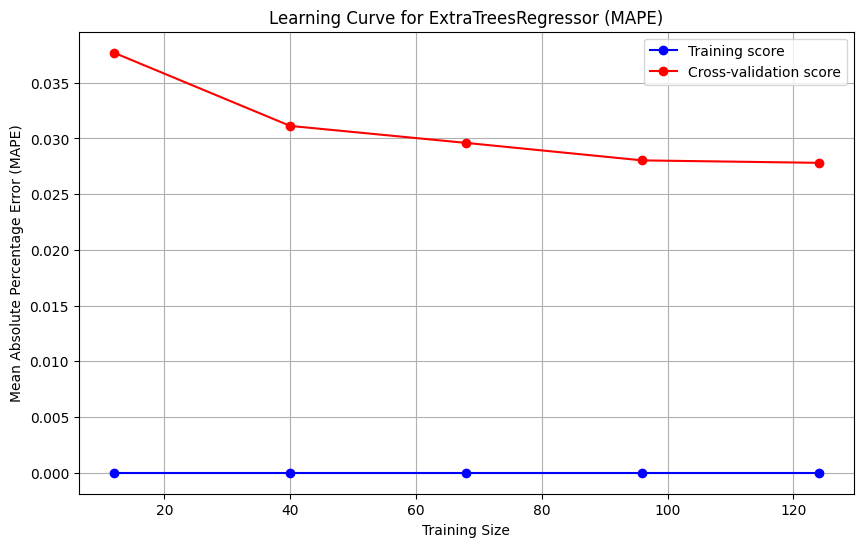

In [ ]:
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import learning_curve
import numpy as np

# Inisialisasi model ExtraTreesRegressor
best_model = ExtraTreesRegressor(random_state=42)

# Membuat learning curve
train_sizes, train_scores, test_scores = learning_curve(
    estimator=best_model,
    X=X_train_final,
    y=y_train,
    cv=5,
    scoring='neg_mean_absolute_percentage_error',
    n_jobs=-1
)

# Menghitung rata-rata skor dan mengubah nilai negatif menjadi positif
train_mean = np.mean(train_scores, axis=1) * -1  # Negatif -> Positif
test_mean = np.mean(test_scores, axis=1) * -1    # Negatif -> Positif

# Membuat plot learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label="Training score", color='blue', marker='o')
plt.plot(train_sizes, test_mean, label="Cross-validation score", color='red', marker='o')

# Menambahkan label, judul, dan grid
plt.title("Learning Curve for ExtraTreesRegressor (MAPE)")
plt.xlabel("Training Size")
plt.ylabel("Mean Absolute Percentage Error (MAPE)")
plt.legend(loc="best")
plt.grid(True)

# Menampilkan plot
plt.show()


                            Feature  Importance
4          Maternal_mortality_ratio    0.441403
3                  Infant_mortality    0.328048
1                    Fertility_Rate    0.128563
7           Physicians_per_thousand    0.027848
5                      Minimum_wage    0.018913
0                    CPI_Change_(%)    0.015701
6  Out_of_pocket_health_expenditure    0.015142
2                               GDP    0.014825
8                        Population    0.009556


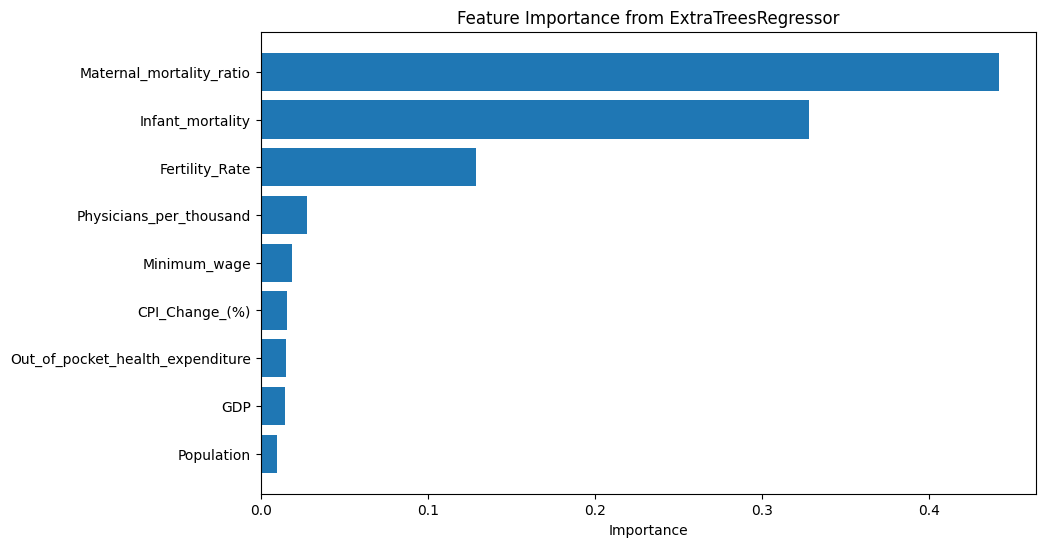

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesRegressor


# Initialize the ExtraTreesRegressor model
model = ExtraTreesRegressor(random_state=42)

# Fit the model
model.fit(X_train_final, y_train)

# Get feature importances
importances = model.feature_importances_

# Create a DataFrame for better visualization
feature_names = X_train_final.columns  # Assuming X_train_final is a DataFrame with feature names
feature_importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
})

# Sort by importance
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)

# Display the feature importance DataFrame
print(feature_importance_df)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance from ExtraTreesRegressor')
plt.gca().invert_yaxis()  # Invert y-axis for better visualization
plt.show()


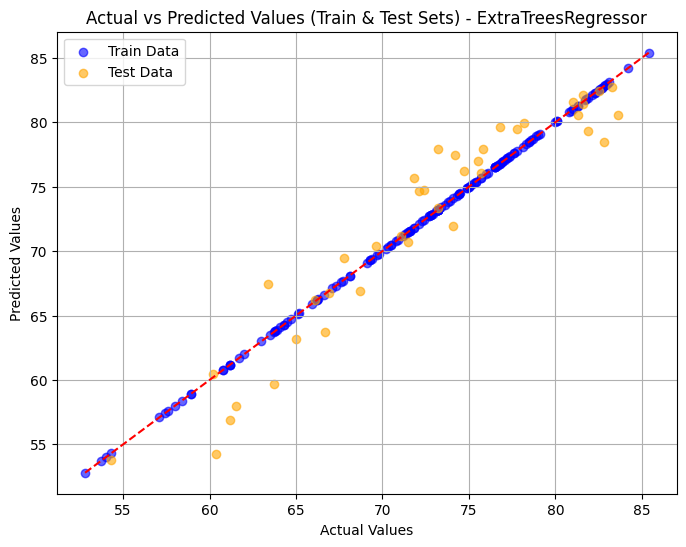

In [ ]:
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesRegressor

# Menggunakan model terbaik ExtraTreesRegressor
best_rf_model = ExtraTreesRegressor(random_state=42)
best_rf_model.fit(X_train_final, y_train)

# Predict nilai pada data pelatihan dan pengujian
y_pred_train = best_rf_model.predict(X_train_final)
y_pred_test = best_rf_model.predict(X_test_final)

# Membuat scatter plot untuk nilai aktual vs prediksi
plt.figure(figsize=(8, 6))

# Plot data pelatihan
plt.scatter(y_train, y_pred_train, alpha=0.6, label='Train Data', color='blue')

# Plot data pengujian
plt.scatter(y_test, y_pred_test, alpha=0.6, label='Test Data', color='orange')

# Menambahkan garis 45 derajat (prediksi sempurna)
plt.plot([min(y_train.min(), y_test.min()), max(y_train.max(), y_test.max())],
         [min(y_train.min(), y_test.min()), max(y_train.max(), y_test.max())],
         color='red', linestyle='--')

# Menambahkan judul dan label sumbu
plt.title('Actual vs Predicted Values (Train & Test Sets) - ExtraTreesRegressor')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

# Menambahkan legenda
plt.legend()

# Menampilkan plot
plt.grid(True)
plt.show()


Done in 0.996s


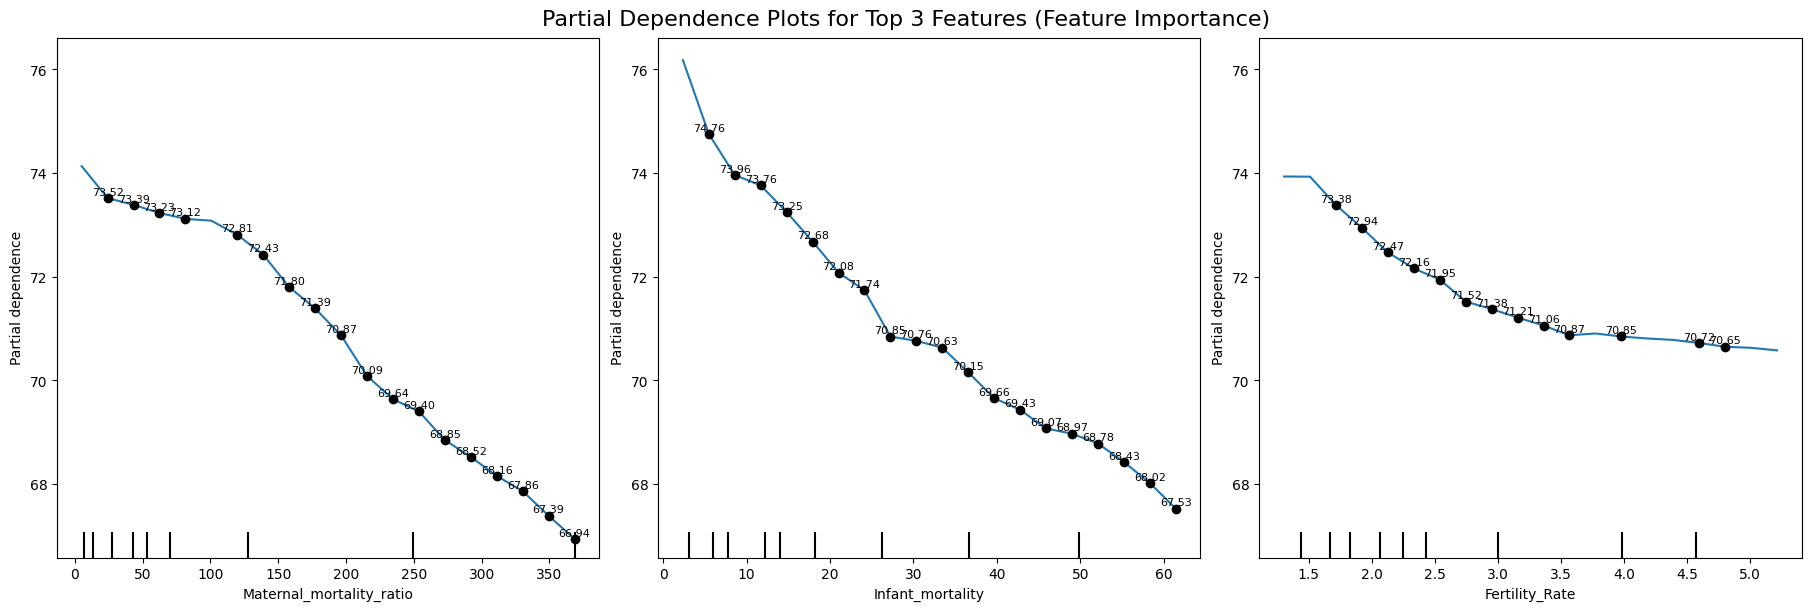

In [ ]:
import matplotlib.pyplot as plt
from sklearn.inspection import PartialDependenceDisplay
from sklearn.ensemble import ExtraTreesRegressor
from time import time
import numpy as np
import pandas as pd

# Inisialisasi model
model = ExtraTreesRegressor(random_state=42)
model.fit(X_train, y_train)

# Menghitung feature importance
feature_importances = model.feature_importances_
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False).reset_index(drop=True)

# Ambil 3 fitur terpenting
top_features = importance_df['Feature'][:3].tolist()

# Plot PDP untuk 3 fitur terpenting
tic = time()
fig, ax = plt.subplots(ncols=3, figsize=(18, 6), constrained_layout=True)

PartialDependenceDisplay.from_estimator(
    model,
    X_train,
    features=top_features,
    feature_names=X_train.columns.tolist(),
    ax=ax,
    kind="average",
    grid_resolution=20
)

# Tambahkan angka pada titik dengan perubahan signifikan tanpa tumpang tindih
for sub_ax in ax.ravel():
    for line in sub_ax.get_lines():
        x_data = line.get_xdata()
        y_data = line.get_ydata()

        # Threshold untuk perubahan signifikan
        threshold = 0.05
        plotted_labels = []  # Menyimpan posisi label yang sudah ditampilkan

        for i in range(1, len(x_data)):
            diff = np.abs(y_data[i] - y_data[i - 1])

            if diff > threshold:
                y_value = f"{y_data[i]:.2f}"  # Format angka dengan 2 desimal
                label_pos = (x_data[i], y_data[i])

                # Cek apakah label ini terlalu dekat dengan yang sudah ada
                too_close = any(
                    np.sqrt((label_pos[0] - existing[0])**2 + (label_pos[1] - existing[1])**2) < 0.1
                    for existing in plotted_labels
                )

                # Plot titik data tanpa menggeser
                sub_ax.plot(x_data[i], y_data[i], 'o', color="black")

                if too_close:
                    # Jika terlalu dekat, geser label ke atas
                    sub_ax.text(
                        x_data[i],
                        y_data[i] + 0.05,  # Offset lebih besar jika berdekatan
                        y_value,
                        fontsize=8,
                        color="black",
                        ha="center",
                        va="bottom",
                    )
                else:
                    # Tampilkan label di posisi normal
                    sub_ax.text(
                        x_data[i],
                        y_data[i] + 0.02,
                        y_value,
                        fontsize=8,
                        color="black",
                        ha="center",
                        va="bottom",
                    )
                # Tambahkan posisi label ke daftar
                plotted_labels.append(label_pos)

print(f"Done in {time() - tic:.3f}s")
plt.suptitle("Partial Dependence Plots for Top 3 Features (Feature Importance)", fontsize=16)
plt.show()
